/home/raul/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


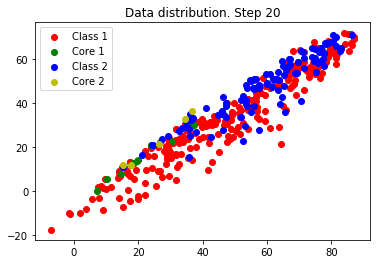




20 batches of 365 instances
Average execution time:  0.124257718999
Average Accuracy:  0.72791441317
Standard Deviation:  0.0302876152215
Variance:  0.000917339635807


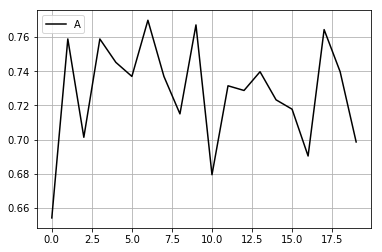

STARTING TEST with Cluster and label as classifier and GMM as cutting data


TypeError: unhashable type: 'numpy.ndarray'

<function __main__.main.<locals>.run>

In [5]:
import sys
import os
from source import plotFunctions
from timeit import default_timer as timer
import numpy as np
from experiments import setup
from source import metrics
from experiments.methods import kmeans_svm
from experiments.methods import proposed_gmm_core_extraction
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import Audio, display



class Experiment():
    def __init__(self, method):
        #commom for all experiments
        self.method = method
        self.initialLabeledDataPerc=0.05
        self.classes=[0, 1]
        self.usePCA=False
        #used only by gmm and cluster-label process
        self.densityFunction='gmm'
        self.excludingPercentage = 0.3
        self.K = 5
        self.classifier='cluster_and_label'
        #used in alpha-shape version only
        self.CP=0.65
        self.alpha=0.5
        #used in kmeans_svm and compose only
        self.useSVM=False
        self.isImbalanced=False


def doExperiments(dataValues, dataLabels, experiments, numberOfTimes, batches):
    sizeOfBatch = 365#int(len(dataLabels)/batches)
        
    for name, e in experiments.items():
        CoreX = []
        CoreY = []
        elapsedTime = []
        accTotal = []
        accuracies=[]
        e.sizeOfBatch = sizeOfBatch
        e.batches = batches
        e.dataLabels = dataLabels
        e.dataValues = dataValues
        
        for i in range(numberOfTimes):
            start = timer()
            #accuracy per step
            accuracies, CoreX, CoreY = e.method.start(dataValues=e.dataValues, dataLabels=e.dataLabels, usePCA=e.usePCA, classes=e.classes, classifier=e.classifier, densityFunction=e.densityFunction, batches=e.batches, sizeOfBatch = e.sizeOfBatch, initialLabeledDataPerc=e.initialLabeledDataPerc, excludingPercentage=e.excludingPercentage, K=e.K, CP=e.CP, alpha=e.alpha, useSVM=e.useSVM, isImbalanced=e.isImbalanced)
            end = timer()
            averageAccuracy = np.mean(accuracies)
            
            #elapsed time per step
            elapsedTime.append(end - start)
            
            accTotal.append(averageAccuracy)
        #print("Total of ", numberOfTimes, " experiment iterations with an average accuracy of ", np.mean(accTotal))
        
        #print data distribution in step t
        initial = (batches*sizeOfBatch)-sizeOfBatch
        final = initial + sizeOfBatch
        plotFunctions.plot(dataValues[initial:final], dataLabels[initial:final], CoreX, CoreY, batches)
        print("\n\n")
        print("{} batches of {} instances".format(batches, sizeOfBatch))
        print("Average execution time: ", np.mean(elapsedTime))
        metrics.finalEvaluation(accuracies)
        

def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'
    
    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'experiments/data'+sep
    
    #loading a dataset
    dataValues, dataLabels = setup.loadNOAADataset(path)
    #dataValues, dataLabels = setup.load2CDT(path)
        
    '''
    SVM Linear Kernel
    '''
    experiments[1] = Experiment(kmeans_svm)
    
    
    ''' Proposed Method 1 (GMM extracting core supports) '''
    experiments[2] = Experiment(proposed_gmm_core_extraction)
    
    
    #running pywidget
    def run(batches):
        doExperiments(dataValues, dataLabels, experiments, 1, batches)
        
    v = interact(run, batches=(1, 40, 1));
    display(v)

    
if __name__ == "__main__":
    main()